In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
df = pd.read_csv("concrete_data.csv")
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [4]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### null value checking

In [5]:
# checking for null values
print("checking for null values : ")
df.isnull().sum()

checking for null values : 


cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

#### correcting for column names

In [6]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [7]:
df.rename(columns={'fine_aggregate ' : 'fine_aggregate'}, inplace=True)

In [8]:
# checking for duplicates
print("number of duplicates : ", df.duplicated().sum())
print("************removing duplicates**********")
df.drop_duplicates(inplace=True)
print()
print("after removing duplicates")
print("number of duplicates  : ", df.duplicated().sum())

number of duplicates :  25
************removing duplicates**********

after removing duplicates
number of duplicates  :  0


array([[<Axes: title={'center': 'cement'}>,
        <Axes: title={'center': 'blast_furnace_slag'}>,
        <Axes: title={'center': 'fly_ash'}>],
       [<Axes: title={'center': 'water'}>,
        <Axes: title={'center': 'superplasticizer'}>,
        <Axes: title={'center': 'coarse_aggregate'}>],
       [<Axes: title={'center': 'fine_aggregate'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'concrete_compressive_strength'}>]],
      dtype=object)

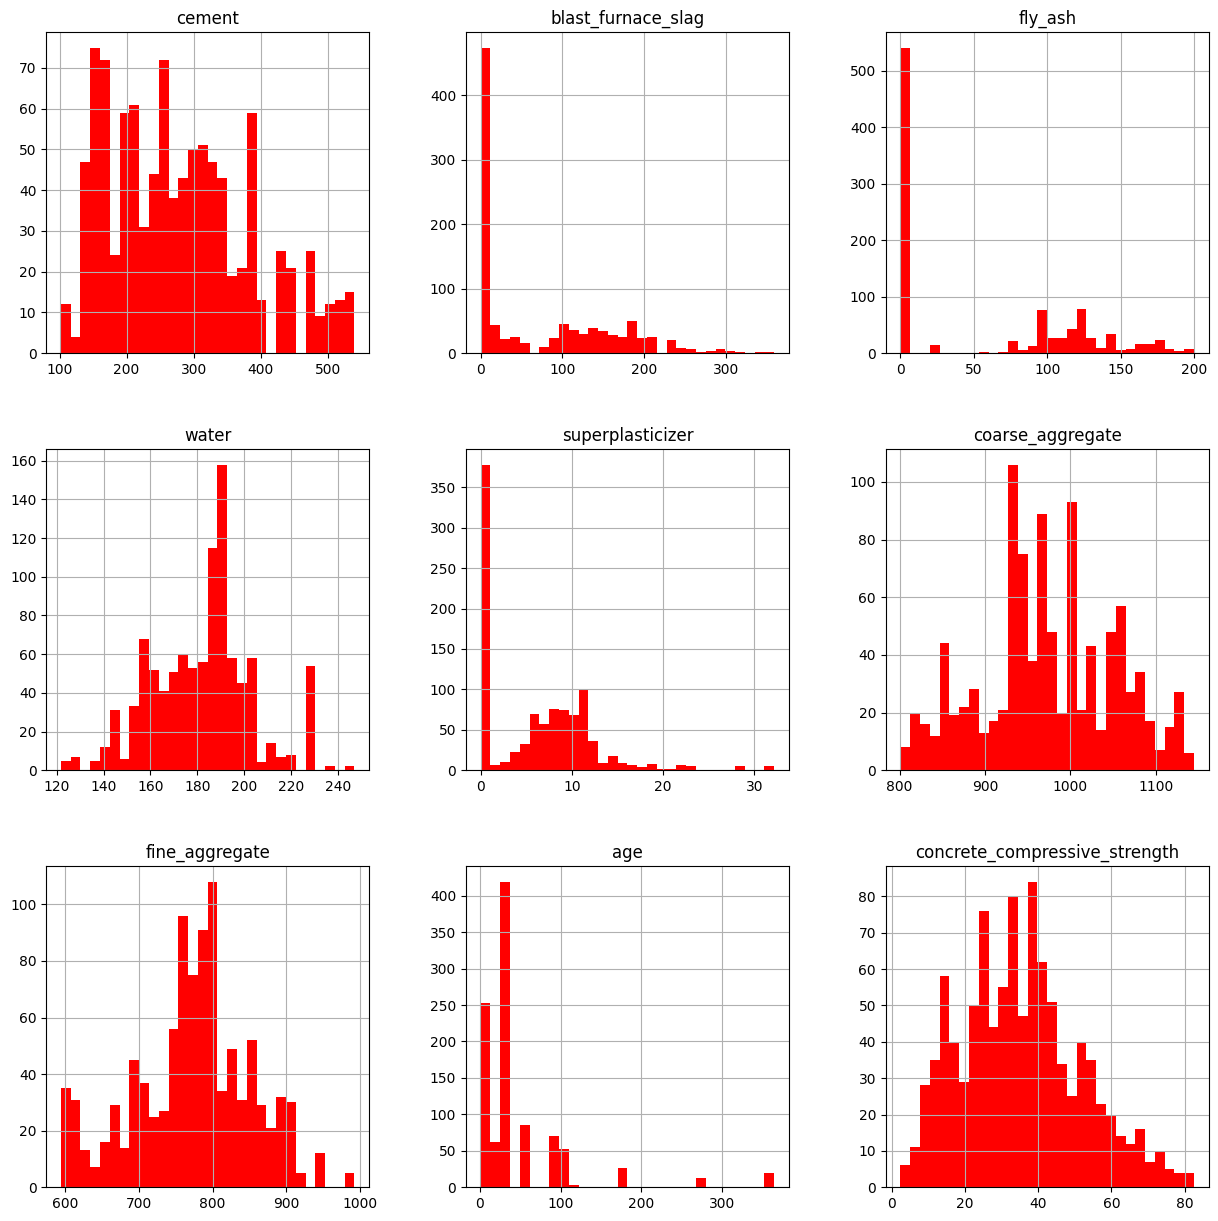

In [9]:
# visualizing distribution 
df.hist(bins=30, figsize=(15,15), color = "r")

**observation**
- looks like age column are limited values

In [10]:
# see number of unique values
df['age'].nunique()

14

In [11]:
# which are the unique values
df['age'].unique()

array([ 28, 270, 365, 360,  90, 180,   3,   7,  56,  91,  14, 100, 120,
         1], dtype=int64)

In [12]:
# count of unique values
df['age'].value_counts()

age
28     419
3      129
7      122
56      86
14      62
90      54
100     52
180     26
91      17
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

**observation**
- age is a categorical column

#### converting age to categorical column

In [13]:
df['age'] = df['age'].astype('category').cat.codes
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,4,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,4,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,11,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,13,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,12,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,4,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,4,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,4,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,4,32.77


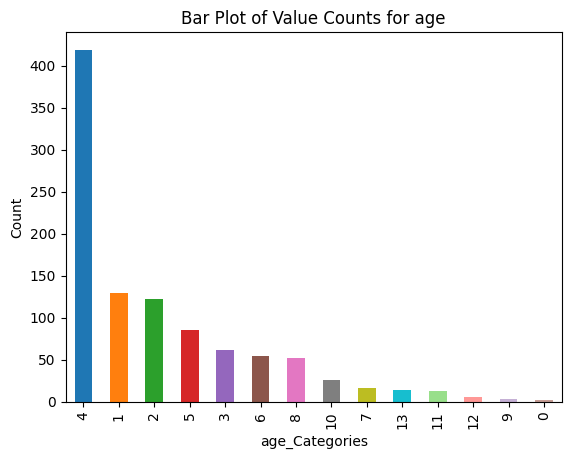

In [14]:
# visualizing age_category
value_counts = df['age'].value_counts()

# Create the bar plot
value_counts.plot.bar(color= ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
          '#7f7f7f', '#bcbd22', '#17becf', '#98df8a', '#ff9896', '#c5b0d5', '#c49c94'])

# Set the labels and title
plt.xlabel('age_Categories')
plt.ylabel('Count')
plt.title('Bar Plot of Value Counts for age')

# Show the plot
plt.show()

### visualizing outliers using box plot

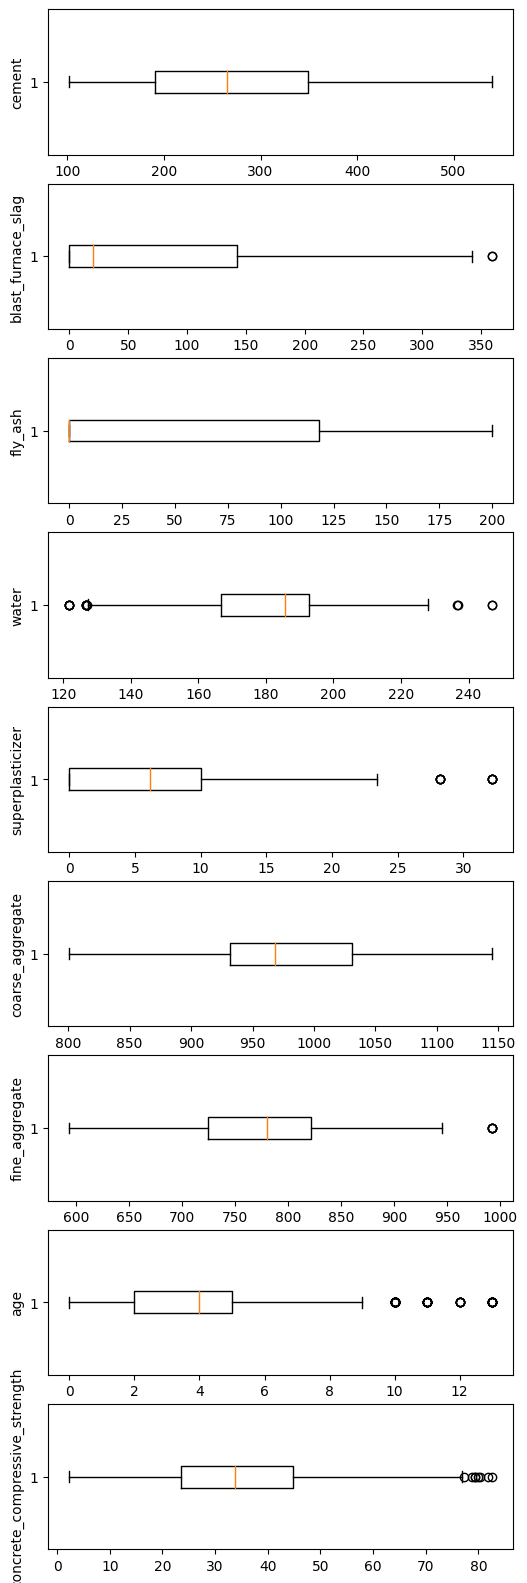

In [15]:
fig, ax = plt.subplots(9, 1, figsize = (6, 20))
i = 0


for col in df.columns :
    ax[i].boxplot(df[col], vert=False)
    ax[i].set_ylabel(col)
    i += 1

### removing outliers

- somestimes outliers makes performance better in the actual environment because they stop algorithm from overfitting
- but in this case we are removing them

In [16]:
quartile  = df.quantile([0.25, 0.75], axis=0)

IQR = quartile.loc[0.75] - quartile.loc[0.25]

lower_range = quartile.loc[0.25] - 1.5 * IQR
upper_range = quartile.loc[0.75] + 1.5 * IQR

for col in df.columns:
    if col == 'age' or 'age_category':
        continue
    else:
        df = df[(df[col] > lower_range[col]) & (df[col] < upper_range[col])]



### Looking for correlation

<Axes: >

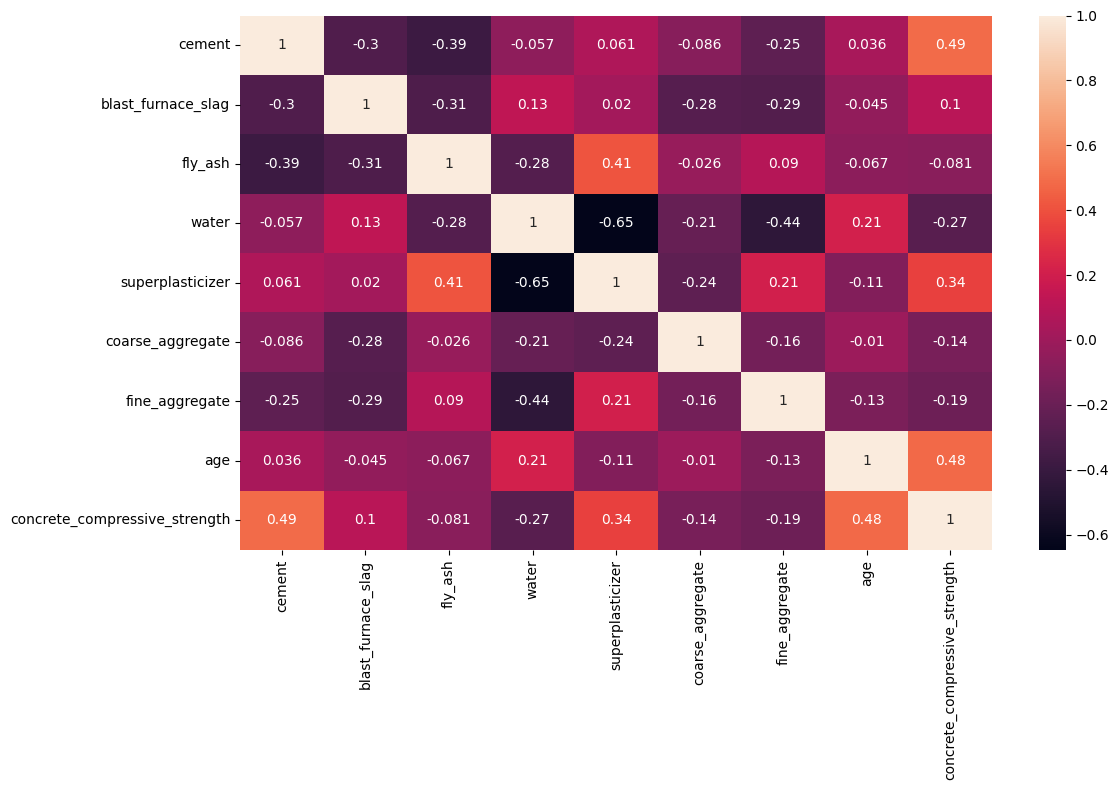

In [17]:
correlation = df.corr()
plt.figure(figsize = (12,8), layout ='tight')
sns.heatmap(correlation, annot=True, )

**observation**
- from above graph we can say that `cement`, `water`, `superplasticizer`, `age` and `water` are highly corelated with each other.
- But, we can also see some multi-multicollinearity between them like *water & superplasticizer* are highly correlated with each other similarly 'blast_furnace_slag' is highly corelated with 'fine aggregate', 'course aggregate' each other.
- as we know that `fine aggregate` mostly contributes to **workability** of concrete and `course aggregate` contributes to compactness and interlocking between the steel and matterials which essentially contribute to the strength. so we should select both of them.
- `blast furnace slag` is used as replacement for fine aggregate.


###  feature selection

In [18]:
# features ==> cement, water, superplasticizer, age , fine aggregate, course aggregate and water

# Independent features
x = df[['cement', 'water' ,'superplasticizer', 'coarse_aggregate','fine_aggregate', 'age'  ]]

# dependent feature
y = df[['concrete_compressive_strength']]

### Standardization

In [19]:

def standard (x) :
    mean = x.mean()
    std = x.std()

    standardize_data = (x - mean)/std
    return standardize_data

x = standard(x)
y = standard(y)

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=23)

In [99]:
hidden_units1 = 160
hidden_units2 = 256
hidden_units3 = 128
learning_rate = 0.01


def build_sequential_model():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    
    return model

model = build_sequential_model()

In [100]:
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, 
             optimizer=Adam(learning_rate=learning_rate),
             metrics=[msle])

history = model.fit(x_train, y_train, epochs =50, batch_size=100, validation_data=(x_test, y_test))

Epoch 1/50
9/9 [==============================] - 1s 19ms/step - loss: 0.0835 - mean_squared_logarithmic_error: 0.0867 - val_loss: 0.0558 - val_mean_squared_logarithmic_error: 0.0910
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0462 - mean_squared_logarithmic_error: 0.0433 - val_loss: 0.0496 - val_mean_squared_logarithmic_error: 0.0639
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0415 - mean_squared_logarithmic_error: 0.0372 - val_loss: 0.0542 - val_mean_squared_logarithmic_error: 0.0575
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0379 - mean_squared_logarithmic_error: 0.0371 - val_loss: 0.0461 - val_mean_squared_logarithmic_error: 0.0410
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0353 - mean_squared_logarithmic_error: 0.0340 - val_loss: 0.0491 - val_mean_squared_logarithmic_error: 0.0376
Epoch 6/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0356 - mean_squar

Epoch 46/50
9/9 [==============================] - 0s 5ms/step - loss: 0.0270 - mean_squared_logarithmic_error: 0.0241 - val_loss: 0.0419 - val_mean_squared_logarithmic_error: 0.0363
Epoch 47/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0270 - mean_squared_logarithmic_error: 0.0242 - val_loss: 0.0400 - val_mean_squared_logarithmic_error: 0.0313
Epoch 48/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0230 - mean_squared_logarithmic_error: 0.0264 - val_loss: 0.0422 - val_mean_squared_logarithmic_error: 0.0312
Epoch 49/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0282 - mean_squared_logarithmic_error: 0.0289 - val_loss: 0.0432 - val_mean_squared_logarithmic_error: 0.0312
Epoch 50/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0261 - mean_squared_logarithmic_error: 0.0285 - val_loss: 0.0446 - val_mean_squared_logarithmic_error: 0.0301


In [86]:
def plot_history (history, key ):
    plt.plot(history.history[key])
    plt.plot(history.history['val_'+key])
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend([key, 'val_'+key])
    plt.show()

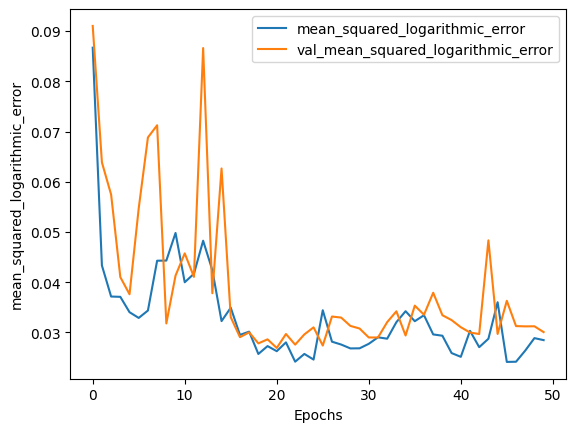

In [101]:
plot_history(history, 'mean_squared_logarithmic_error')